In [1]:
import cv2
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

c:\Users\ADMIN\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
dataset_train = pd.read_csv("./data/train.csv").drop(columns="label")
label_train = pd.read_csv("./data/train.csv")["label"]
dataset_test = pd.read_csv("./data/test.csv")

In [3]:
dataset_train.shape

(42000, 784)

In [4]:
dataset_test.shape

(28000, 784)

In [5]:
def create_image(dataset, label, is_train):
    labels_data = []
    images_data = []
    for idx, row in dataset.iterrows():
        image = row.to_numpy(dtype=int).reshape(28, 28)
        images_data.append(image / 255.0)
        if is_train:
            labels_data.append(label.loc[idx])
    return labels_data, images_data

In [6]:
labels_data, train_images_data = create_image(dataset_train, label_train, True)
_, test_images_data = create_image(dataset_test, label_train, True)

In [7]:
lb_encoder = LabelBinarizer()
labels_data = lb_encoder.fit_transform(labels_data)

In [8]:
train_images_data = np.array(train_images_data)
labels_data = np.array(labels_data)
test_images_data = np.array(test_images_data)

In [9]:
X_train, X_val, Y_train, Y_val = train_test_split(
    train_images_data, labels_data, test_size=0.2
)

In [10]:
model = Sequential()

model.add(
    Conv2D(
        32, (3, 3), padding="same", activation="relu", input_shape=(28, 28, 1)
    )
)

model.add(Conv2D(32, (3, 3), activation="relu"))

model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(128, activation="relu"))

model.add(Dense(10, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                        

In [11]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [12]:
X_train.shape

(33600, 28, 28)

In [13]:
H = model.fit(
    X_train,
    Y_train,
    validation_data=(X_val, Y_val),
    batch_size=32,
    epochs=10,
    verbose=1,
)

Epoch 1/10
1050/1050 [==============================] - 15s 6ms/step - loss: 0.1621 - accuracy: 0.9512 - val_loss: 0.0692 - val_accuracy: 0.9785
Epoch 2/10
1050/1050 [==============================] - 5s 5ms/step - loss: 0.0482 - accuracy: 0.9854 - val_loss: 0.0470 - val_accuracy: 0.9855
Epoch 3/10
1050/1050 [==============================] - 5s 5ms/step - loss: 0.0282 - accuracy: 0.9907 - val_loss: 0.0452 - val_accuracy: 0.9854
Epoch 4/10
1050/1050 [==============================] - 5s 5ms/step - loss: 0.0187 - accuracy: 0.9945 - val_loss: 0.0508 - val_accuracy: 0.9850
Epoch 5/10
1050/1050 [==============================] - 5s 5ms/step - loss: 0.0153 - accuracy: 0.9946 - val_loss: 0.0443 - val_accuracy: 0.9894
Epoch 6/10
1050/1050 [==============================] - 5s 5ms/step - loss: 0.0096 - accuracy: 0.9971 - val_loss: 0.0592 - val_accuracy: 0.9855
Epoch 7/10
1050/1050 [==============================] - 5s 5ms/step - loss: 0.0112 - accuracy: 0.9962 - val_loss: 0.0689 - val_accuracy

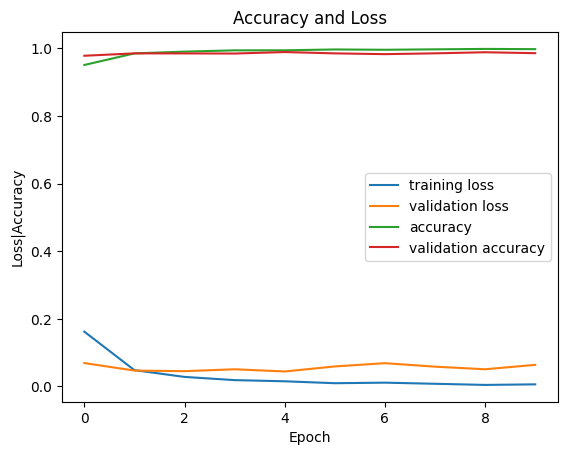

In [14]:
fig = plt.figure()
numOfEpoch = 10
plt.plot(np.arange(0, numOfEpoch), H.history["loss"], label="training loss")
plt.plot(
    np.arange(0, numOfEpoch), H.history["val_loss"], label="validation loss"
)
plt.plot(np.arange(0, numOfEpoch), H.history["accuracy"], label="accuracy")
plt.plot(
    np.arange(0, numOfEpoch),
    H.history["val_accuracy"],
    label="validation accuracy",
)
plt.title("Accuracy and Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss|Accuracy")
plt.legend()

1/1 [==============================] - 0s 17ms/step
The value is: 8


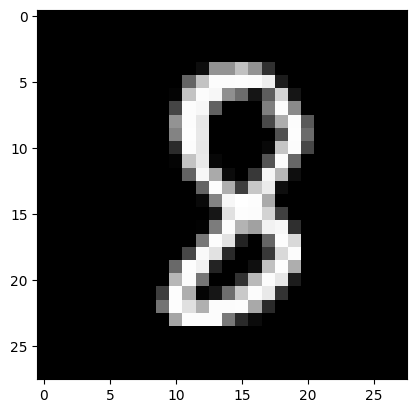

In [22]:
ran_num = rd.randrange(len(test_images_data))
plt.imshow(test_images_data[ran_num].reshape(28, 28), cmap="gray")
y_predict = model.predict(test_images_data[ran_num].reshape(1, 28, 28, 1))
print(f"The value is: {np.argmax(y_predict)}")